# Preprocessing and Linear Regression model Notebook
- Coded By : <span style="color: red;">Eng.Ahmed Almohamdy</span>


# Importing


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from IPython.display import display

In [2]:
pd.set_option('display.max_columns', None)
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.shape

(1460, 81)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handle Null Values

In [5]:
del train_data['Id']

In [6]:
num_cols = list(train_data.describe().columns)
cat_cols = list(set(train_data.columns) - set(num_cols))
print('#Num_cols' , len(num_cols))
print('#Cat_cols' , len(cat_cols))

#Num_cols 37
#Cat_cols 43


- <b> featured to be removed ---> 80%  is nan 
- <b> featured to filled --------> less than 80 % 
- <b> observation to be removed --> less than 3% 

In [7]:
def view_null_count_features(train_data):
    null_count_df = pd.DataFrame(train_data.isna().sum()).rename(columns={0:'count'})
    null_count_df = null_count_df[null_count_df['count'] > 0].sort_values(by= 'count',ascending=False)
    display(null_count_df)
    
    check_80_percent = .8 * train_data.shape[0]
    check_3_percent = .03 * train_data.shape[0]
    
    f_to_be_removed = []
    f_to_be_filled = []
    obs_to_be_removed = []
    
    for col in null_count_df.index :
        if null_count_df.loc[col][0] >= check_80_percent :
            f_to_be_removed.append(col)
        elif (null_count_df.loc[col][0] < check_80_percent and null_count_df.loc[col][0] >= check_3_percent) :
            f_to_be_filled.append(col)
        else :
            obs_to_be_removed.append(col)
    
    print("#>>>f_to_be_removed:", f_to_be_removed)
    print("#>>>f_to_be_filled:", f_to_be_filled)
    print("#>>>obs_to_be_removed:", obs_to_be_removed)
    return f_to_be_removed , f_to_be_filled , obs_to_be_removed
    

    

In [8]:
f_to_be_removed , f_to_be_filled , obs_to_be_removed = view_null_count_features(train_data)

,count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


#>>>f_to_be_removed: ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
#>>>f_to_be_filled: ['MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
#>>>obs_to_be_removed: ['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical']


In [9]:
drop_null_inplace = True
# 1
train_data.drop(columns = f_to_be_removed , inplace= drop_null_inplace)

# 2
for col in f_to_be_filled :
    if col in num_cols:
        train_data[col].fillna(train_data[col].mean() , inplace= drop_null_inplace)
    elif col in cat_cols :
        train_data[col].fillna(train_data[col].mode()[0] , inplace= drop_null_inplace)

# 3
train_data.dropna(axis=0 , subset= obs_to_be_removed  , inplace= drop_null_inplace)


In [10]:
train_data.isna().sum().sum()

0

# Redundant Handling

In [11]:
num_cols = list(train_data.describe().columns)
cat_cols = list(set(train_data.columns) - set(num_cols) )

In [12]:
train_data.shape

(1412, 76)

### Automated function for both categorical and numircal data

In [13]:
def drop_redundant_coulmns(train_data):
    check_value = (80/100) * train_data.shape[0]
    droped_cols_dict = {}
    for col in train_data.columns:
        ma_x = train_data[col].value_counts().max()
        if ma_x >= check_value :
            droped_cols_dict[col] = ma_x
    return droped_cols_dict       
    
    
droped_cols_dict = drop_redundant_coulmns(train_data)
droped_cols_dict # show column and his max value redundant

{'Street': 1406,
 'LandContour': 1267,
 'Utilities': 1411,
 'LandSlope': 1335,
 'Condition1': 1220,
 'Condition2': 1397,
 'BldgType': 1189,
 'RoofMatl': 1387,
 'MasVnrType': 1269,
 'ExterCond': 1239,
 'BsmtCond': 1301,
 'BsmtFinType2': 1246,
 'BsmtFinSF2': 1246,
 'Heating': 1386,
 'CentralAir': 1331,
 'Electrical': 1300,
 'LowQualFinSF': 1387,
 'BsmtHalfBath': 1330,
 'KitchenAbvGr': 1361,
 'Functional': 1322,
 'GarageQual': 1344,
 'GarageCond': 1361,
 'PavedDrive': 1303,
 'EnclosedPorch': 1209,
 '3SsnPorch': 1389,
 'ScreenPorch': 1296,
 'PoolArea': 1405,
 'MiscVal': 1363,
 'SaleType': 1224,
 'SaleCondition': 1159}

In [14]:
droped_cols = list(droped_cols_dict.keys())
print('#drop',len(droped_cols))
droped_cols

#drop 30


['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'MasVnrType',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SaleType',
 'SaleCondition']

In [15]:
train_data.drop(columns= droped_cols,inplace=True)

# Handling correlation between features

In [16]:
num_cols = list(train_data.describe().columns)
cat_cols = list(set(train_data.columns) - set(num_cols))

In [17]:
print('num_cols:',len(num_cols),' cat_cols:',len(cat_cols))

num_cols: 28  cat_cols: 18


In [18]:
corr_matrix = train_data[list(set(num_cols) - set(['SalePrice']))].corr()
corr_matrix

,MoSold,1stFlrSF,GarageYrBlt,GrLivArea,OverallCond,BsmtFullBath,FullBath,WoodDeckSF,MSSubClass,HalfBath,GarageArea,BsmtFinSF1,OpenPorchSF,BsmtUnfSF,LotFrontage,MasVnrArea,YrSold,YearBuilt,LotArea,BedroomAbvGr,2ndFlrSF,TotRmsAbvGrd,GarageCars,YearRemodAdd,OverallQual,TotalBsmtSF,Fireplaces
MoSold,1.000000,0.024335,0.002400,0.050364,-0.008530,-0.028996,0.059877,0.024436,-0.016463,-0.007592,0.020616,-0.020850,0.069473,0.031132,0.005484,-0.009909,-0.148464,0.008403,0.001070,0.051262,0.041707,0.037443,0.033566,0.015944,0.064301,0.002725,0.048784
1stFlrSF,0.024335,1.000000,0.232545,0.564688,-0.145056,0.243480,0.383370,0.243118,-0.254277,-0.123112,0.493446,0.449253,0.213282,0.323319,0.416546,0.348471,-0.010113,0.283967,0.296342,0.120009,-0.198800,0.404941,0.438976,0.244458,0.486418,0.894018,0.409462
GarageYrBlt,0.002400,0.232545,1.000000,0.216442,-0.318041,0.111539,0.470524,0.220414,0.077805,0.182232,0.480758,0.141906,0.211320,0.176708,0.061672,0.247561,-0.002887,0.782055,-0.025509,-0.066865,0.059206,0.141825,0.489577,0.619550,0.518553,0.313682,0.039011
GrLivArea,0.050364,0.564688,0.216442,1.000000,-0.085187,0.023633,0.632736,0.243955,0.073167,0.416331,0.466754,0.200188,0.329026,0.234042,0.369118,0.389884,-0.038223,0.191592,0.260524,0.517501,0.691352,0.827693,0.466083,0.282058,0.594985,0.473111,0.456052
OverallCond,-0.008530,-0.145056,-0.318041,-0.085187,1.000000,-0.064559,-0.190209,-0.013206,-0.063240,-0.072977,-0.163341,-0.057034,-0.041823,-0.159769,-0.054635,-0.134961,0.048668,-0.389624,-0.002941,0.016070,0.022496,-0.058852,-0.193904,0.057361,-0.121155,-0.221992,-0.030047
BsmtFullBath,-0.028996,0.243480,0.111539,0.023633,-0.064559,1.000000,-0.066601,0.167384,0.007005,-0.048553,0.169651,0.639301,0.055204,-0.466741,0.089212,0.077607,0.071713,0.179642,0.157024,-0.155780,-0.180286,-0.057328,0.122583,0.103877,0.082932,0.276712,0.125861
FullBath,0.059877,0.383370,0.470524,0.632736,-0.190209,-0.066601,1.000000,0.195331,0.121525,0.142059,0.412022,0.060432,0.267207,0.301666,0.182111,0.277278,-0.026478,0.474767,0.124752,0.360585,0.424132,0.555163,0.477142,0.454840,0.576543,0.362967,0.246986
WoodDeckSF,0.024436,0.243118,0.220414,0.243955,-0.013206,0.167384,0.195331,1.000000,-0.014568,0.096899,0.225518,0.196236,0.049607,-0.022720,0.075353,0.157566,0.025488,0.225469,0.172281,0.042391,0.082770,0.164481,0.228394,0.199144,0.230274,0.222698,0.194283
MSSubClass,-0.016463,-0.254277,0.077805,0.073167,-0.063240,0.007005,0.121525,-0.014568,1.000000,0.181273,-0.094523,-0.067783,-0.005684,-0.139572,-0.360014,0.023024,-0.026526,0.032256,-0.138298,-0.031432,0.306522,0.030657,-0.034897,0.043906,0.038952,-0.253332,-0.040128
HalfBath,-0.007592,-0.123112,0.182232,0.416331,-0.072977,-0.048553,0.142059,0.096899,0.181273,1.000000,0.156993,-0.015215,0.190067,-0.065741,0.046548,0.197999,-0.005113,0.233529,0.013808,0.235889,0.612688,0.352956,0.214780,0.168525,0.256616,-0.102622,0.198347


#### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable)

In [19]:
def drop_correlated_columns(corr_matrix):
    droped_cols = []
    for row in range(corr_matrix.shape[1]):
        for column in range(row+1 , corr_matrix.shape[1] ):
            if np.abs(corr_matrix.values[row , column]) >= .7 :
                row_with_response = np.corrcoef(train_data['SalePrice'],
                                                train_data[corr_matrix.index[row]])[0,1]
                
                col_with_response = np.corrcoef(train_data['SalePrice'],
                                                train_data[corr_matrix.columns[column]])[0,1]
                
                
                if np.abs(row_with_response) >= np.abs(col_with_response):
                    droped_cols.append(corr_matrix.columns[column])
                else :
                    droped_cols.append(corr_matrix.index[row])
                    
    return droped_cols                    
         
    

corr_droped_cols = list(set(drop_correlated_columns(corr_matrix))) # set then list to remove repeated cols
print(f'the columns are droped are  {corr_droped_cols}')


the columns are droped are  ['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'GarageYrBlt']


In [20]:
train_data.drop(columns=corr_droped_cols,inplace=True)

# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [21]:
num_cols = list((train_data.describe().columns))
cat_cols = list(set(train_data.columns) - set(num_cols) )

In [22]:
def outliers_clamping(train_data , num_cols):
    for col in num_cols:
    
        Q1 = np.quantile(train_data[col] , .25)
        Q3 = np.quantile(train_data[col] , .75)

        IQR = Q3 - Q1

        Upper_Bound = Q3 + 1.5*IQR
        Lower_Bound = Q1 - 1.5*IQR

        indxs = train_data[train_data[col] > Upper_Bound].index 
        train_data.loc[indxs , col] = Upper_Bound
        
        indxs = train_data[train_data[col] < Lower_Bound].index 
        train_data.loc[indxs , col] = Lower_Bound
    
   
outliers_clamping(train_data, num_cols)


# def outliers_clamping(col , value):
    
#     Q1 = np.quantile(train_data[col] , .25)
#     Q3 = np.quantile(train_data[col] , .75)
    
#     IQR = Q3 - Q1
    
#     Upper_Bound = Q3 + 1.5*IQR
#     Lower_Bound = Q1 - 1.5*IQR
    
#     if value > Upper_Bound:
#         return Upper_Bound
#     elif value < Lower_Bound:
#         return Lower_Bound
#     else:
#         return value
  

# for col in num_cols:
#   train_data[col] = train_data[col].apply(lambda x: outliers_clamping(col, x))




# Skewness Handling
- skewness = sum(x-x^)^3/((segma^2)(N-1)) 
> x-x^ first then  ^3  then sum


In [23]:
def calc_skewness(train_data , num_cols):
    N = train_data.shape[0]
    
    skewness_dic ={}
    
    for col in num_cols:
        skewness =np.sum((train_data[col] - np.mean(train_data[col]))**3) / ((N-1) * (np.std(train_data[col])**3))
        skewness_dic[col] = skewness
    
    return skewness_dic 
        
    
skewness_dic = calc_skewness(train_data , num_cols)
skewness_dic

{'MSSubClass': 1.0358635698150689,
 'LotFrontage': 0.04926473428184817,
 'LotArea': 0.19221921445385495,
 'OverallQual': 0.27433619617638766,
 'OverallCond': 0.5903176441112575,
 'YearBuilt': -0.6147421936679174,
 'YearRemodAdd': -0.5293212225536039,
 'MasVnrArea': 1.2812363294500924,
 'BsmtFinSF1': 0.7201693820024557,
 'BsmtUnfSF': 0.7870289079627938,
 '1stFlrSF': 0.6725397428198542,
 '2ndFlrSF': 0.7822275341762273,
 'GrLivArea': 0.6071392877243883,
 'BsmtFullBath': 0.5294842298216864,
 'FullBath': 0.041076607240591034,
 'HalfBath': 0.6445981017873323,
 'BedroomAbvGr': -0.2714663663793416,
 'Fireplaces': 0.5639859831747243,
 'GarageCars': -0.367425243055428,
 'WoodDeckSF': 1.0565560051953393,
 'OpenPorchSF': 1.1380001263188886,
 'MoSold': 0.2095924614373496,
 'YrSold': 0.10663387938167278,
 'SalePrice': 0.8044205018717858}

In [24]:
def log_transform(train_data , skewness_dic):
    print('Features is log_Transformed : ')
    for key , value in skewness_dic.items():
        if np.abs(value) > 1:
            train_data[key] = np.log1p(np.abs( train_data[key]))
            print(key)

      


In [25]:
log_transform(train_data , skewness_dic)

Features is log_Transformed : 
MSSubClass
MasVnrArea
WoodDeckSF
OpenPorchSF


# Feature Scaling
- standardization : use with normally feature
- min-max scaling : use with any another distribution but i should handle outliers 

##### How can i know if feature is normally or not 
using two method 
- QQ plot
- shapiro-wilk test  (most use)

In [26]:
len(num_cols)

24

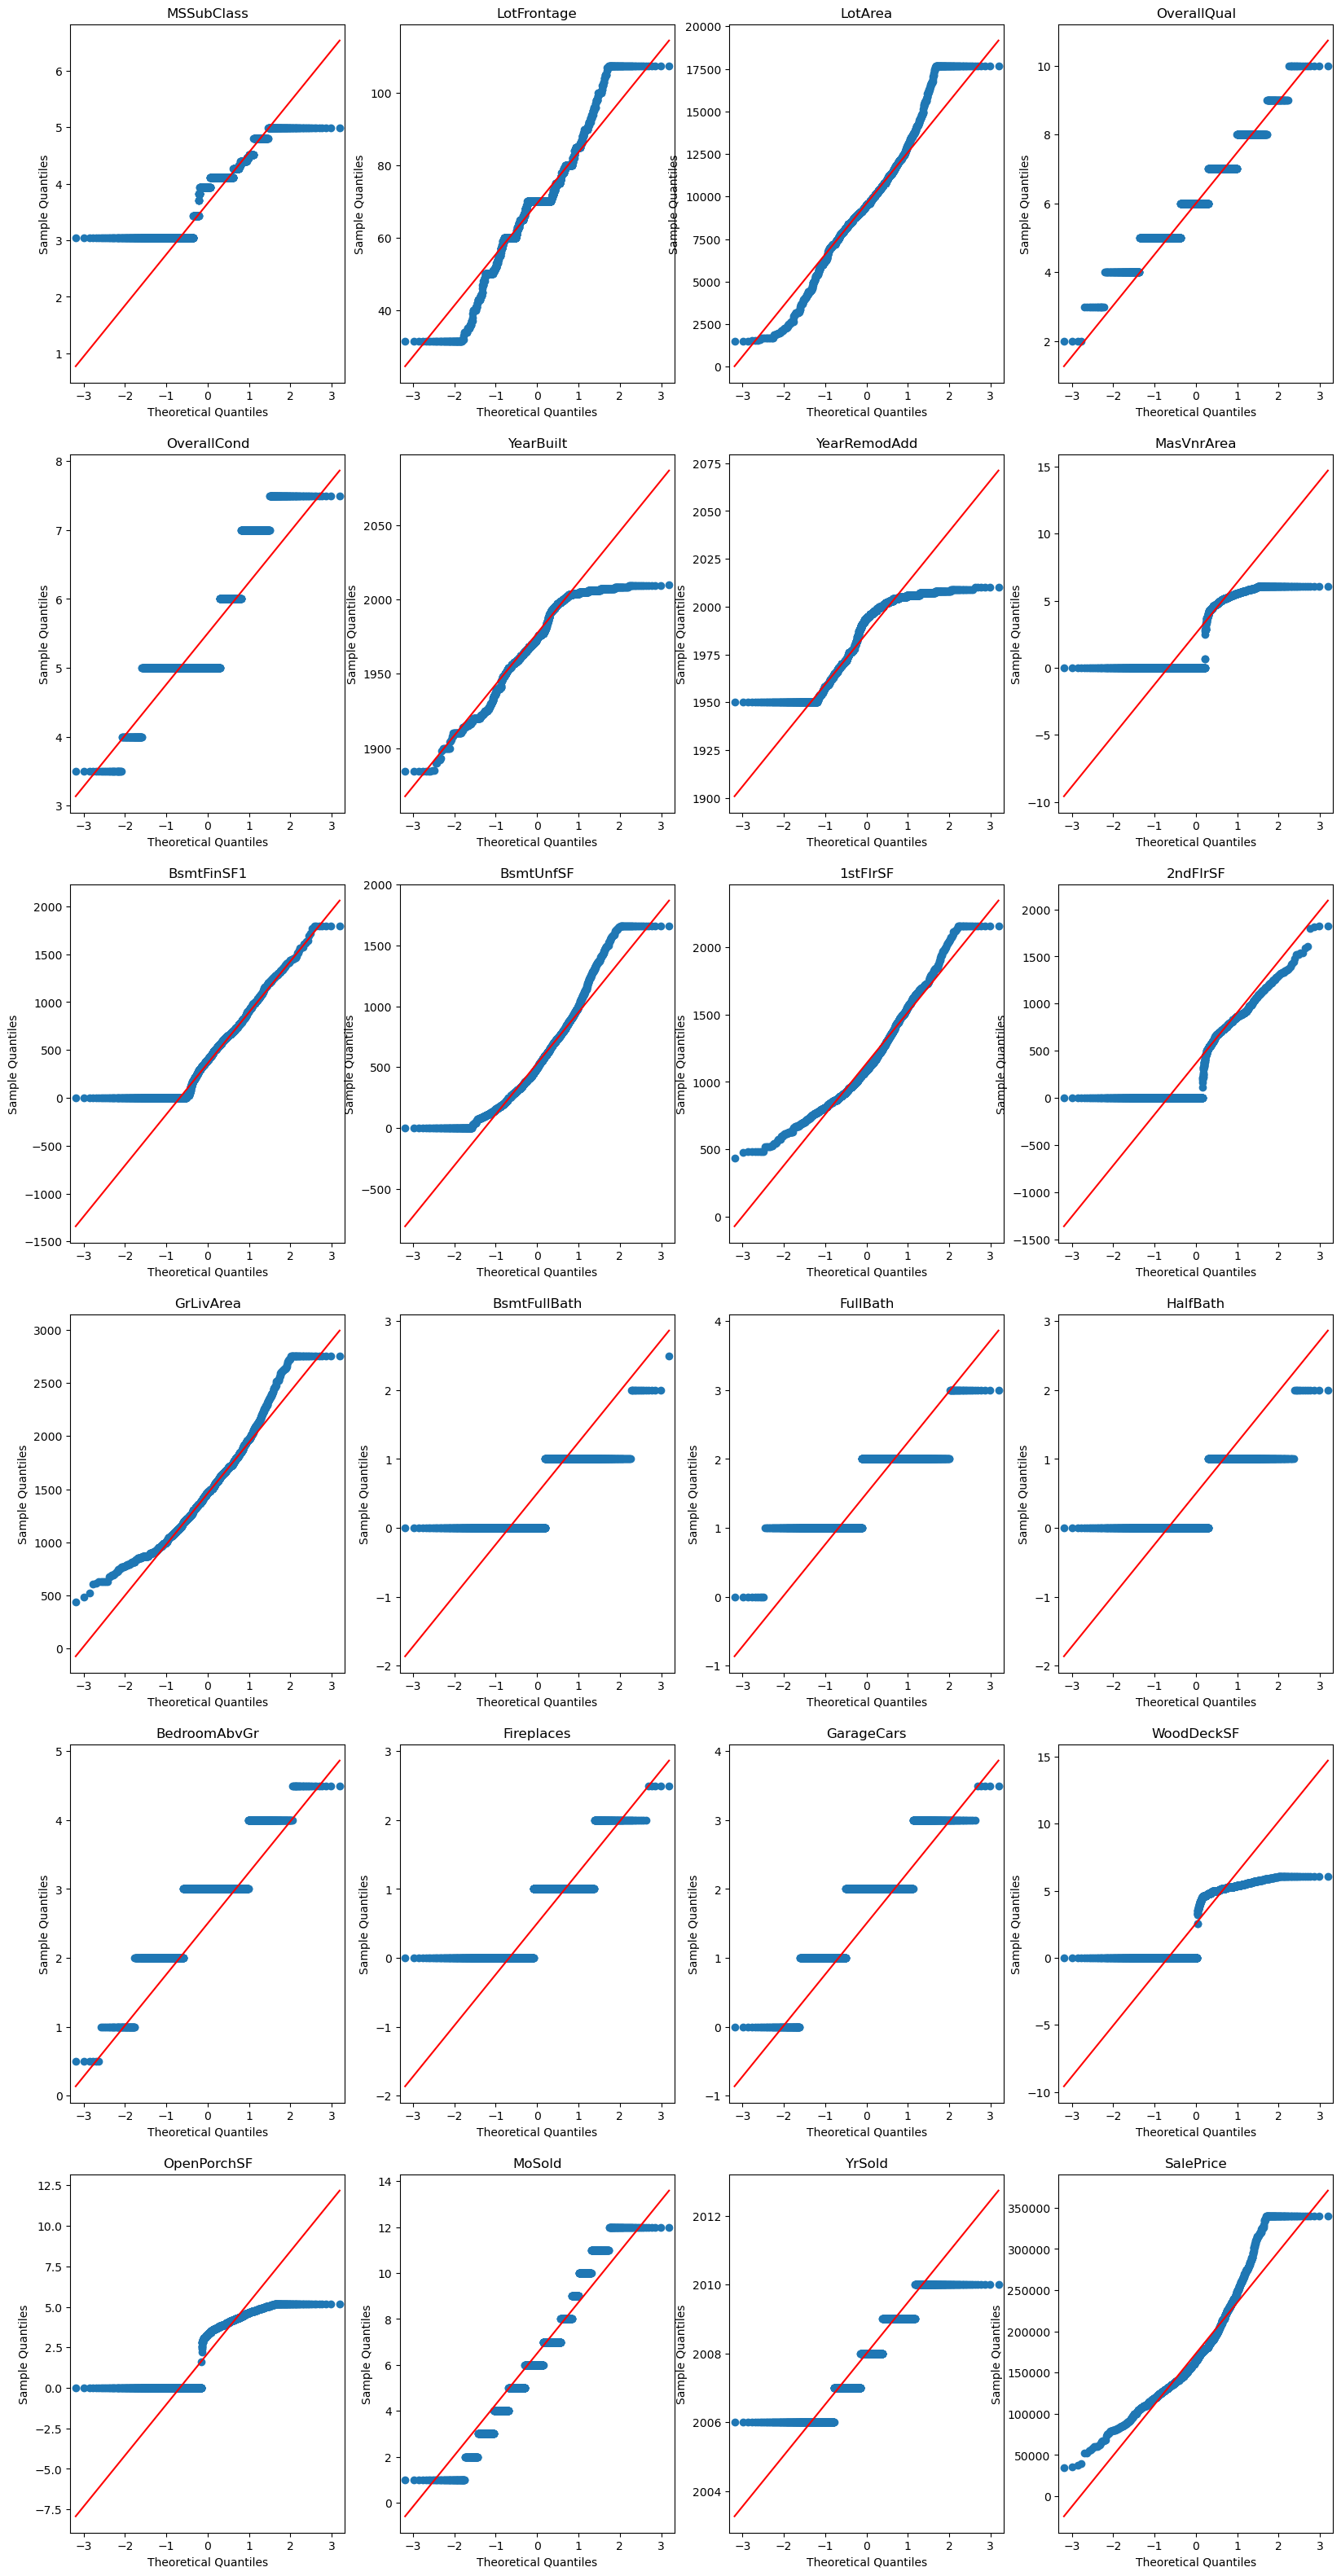

In [27]:
#QQ plot
import statsmodels.api as sm
ncols = 4
nrows=6
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 40))
ax = ax.flatten()
i=0
for col in num_cols:
    sm.qqplot(train_data[col],fit = False, line='q', ax = ax[i])
    ax[i].set_title(col)
    i+=1


plt.show()

#### shapiro-wilk test
- Testing the normally distributed features using Shapiro-Wilk test the null hypothesis here is     that the data follows a normal distribution we reject the null hypothesis (aka: data is not normally distributed) if the p-value is less than alpha (typically 5%) and we fail to reject the null hypothesis (aka: data is normally distributes) if the p-value is greater than alpha


In [28]:
feats_std_scale = []
feats_min_max_scale = []
from scipy.stats import shapiro
for col in num_cols:
    w_stat, p = shapiro(train_data[col])
    

    alpha = 1.76e-20
    if p > alpha:
        print(f'{col} looks like gaussian (####-> fail to reject H0 👌)')
        print('W_Statistic=%.3f, p=%.8f \n' % (w_stat, p))
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        print('W_Statistic=%.3f, p=%.18f \n' % (w_stat, p))
        feats_min_max_scale.append(col)

MSSubClass does not look Gaussian (reject H0)
W_Statistic=0.858, p=0.000000000000000000 

LotFrontage looks like gaussian (####-> fail to reject H0 👌)
W_Statistic=0.967, p=0.00000000 

LotArea looks like gaussian (####-> fail to reject H0 👌)
W_Statistic=0.979, p=0.00000000 

OverallQual does not look Gaussian (reject H0)
W_Statistic=0.945, p=0.000000000000000000 

OverallCond does not look Gaussian (reject H0)
W_Statistic=0.816, p=0.000000000000000000 

YearBuilt does not look Gaussian (reject H0)
W_Statistic=0.922, p=0.000000000000000000 

YearRemodAdd does not look Gaussian (reject H0)
W_Statistic=0.864, p=0.000000000000000000 

MasVnrArea does not look Gaussian (reject H0)
W_Statistic=0.694, p=0.000000000000000000 

BsmtFinSF1 does not look Gaussian (reject H0)
W_Statistic=0.894, p=0.000000000000000000 

BsmtUnfSF does not look Gaussian (reject H0)
W_Statistic=0.934, p=0.000000000000000000 

1stFlrSF looks like gaussian (####-> fail to reject H0 👌)
W_Statistic=0.959, p=0.00000000 



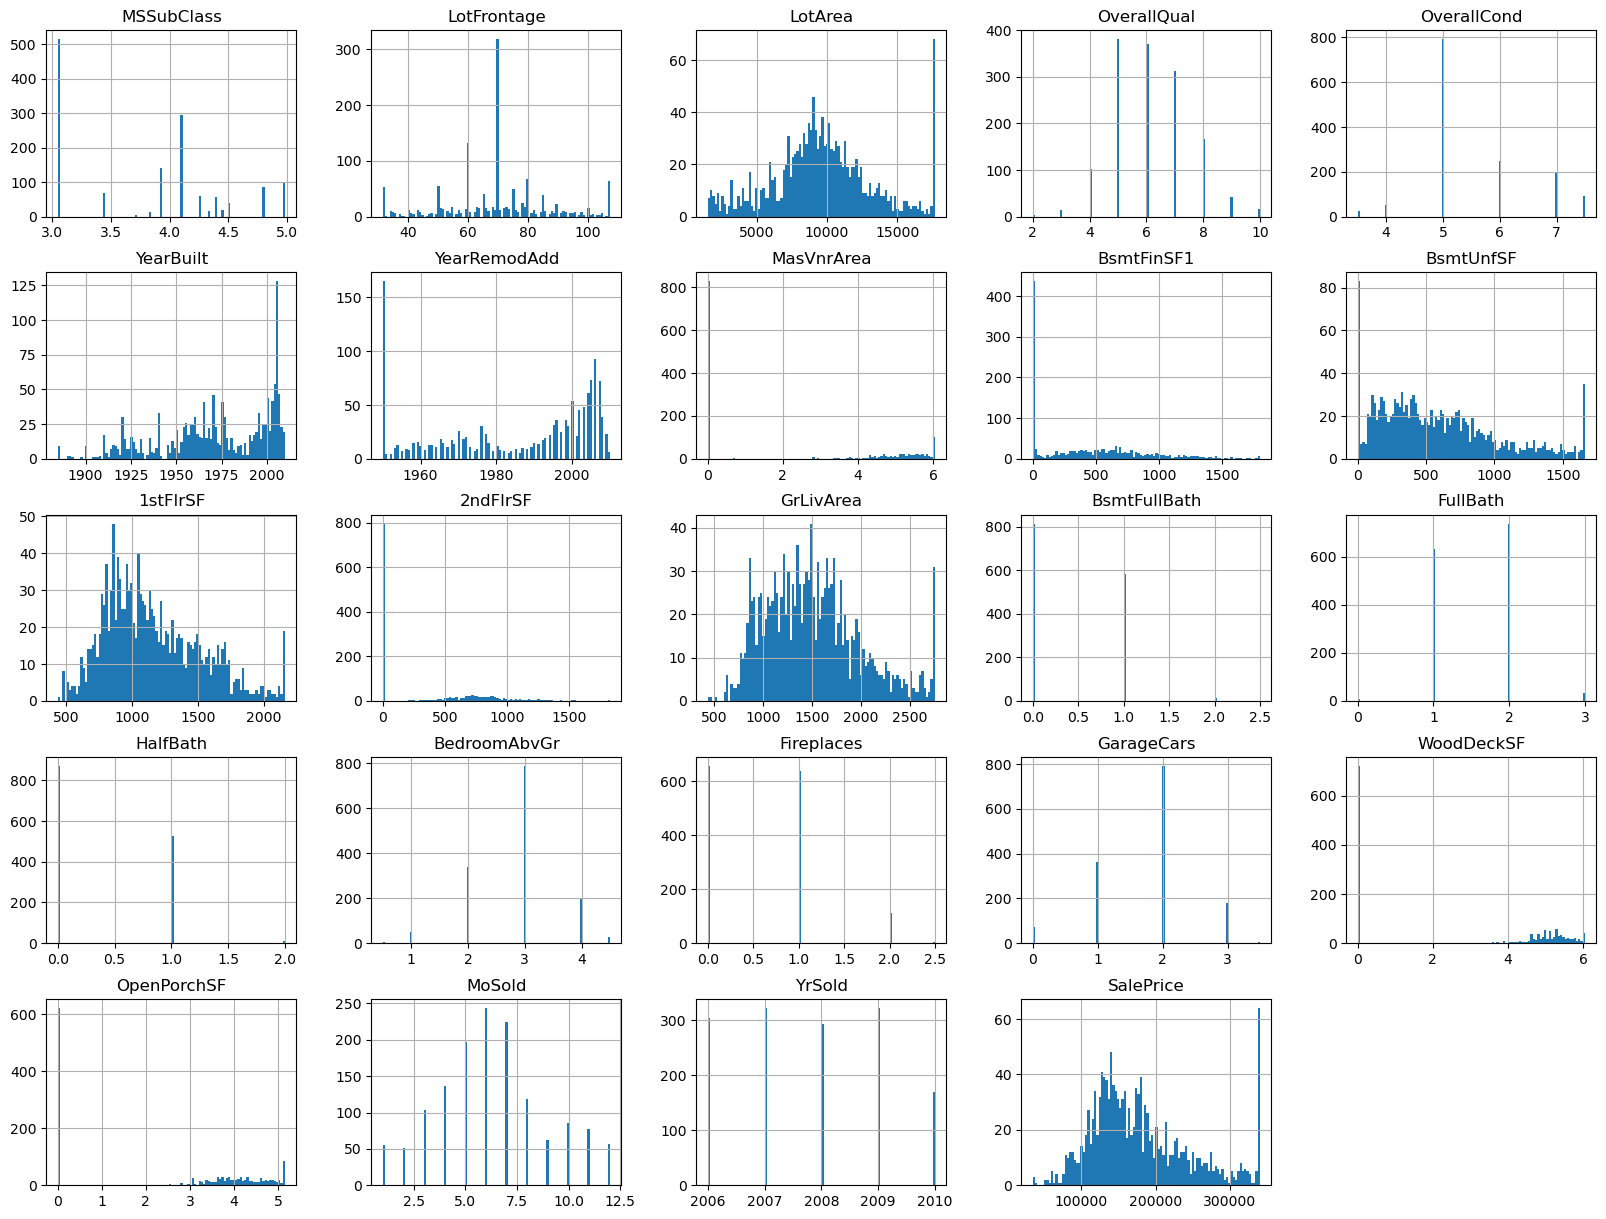

In [29]:
train_data[num_cols].hist(bins = 100, figsize = (20, 15));

# Handling categorical features 

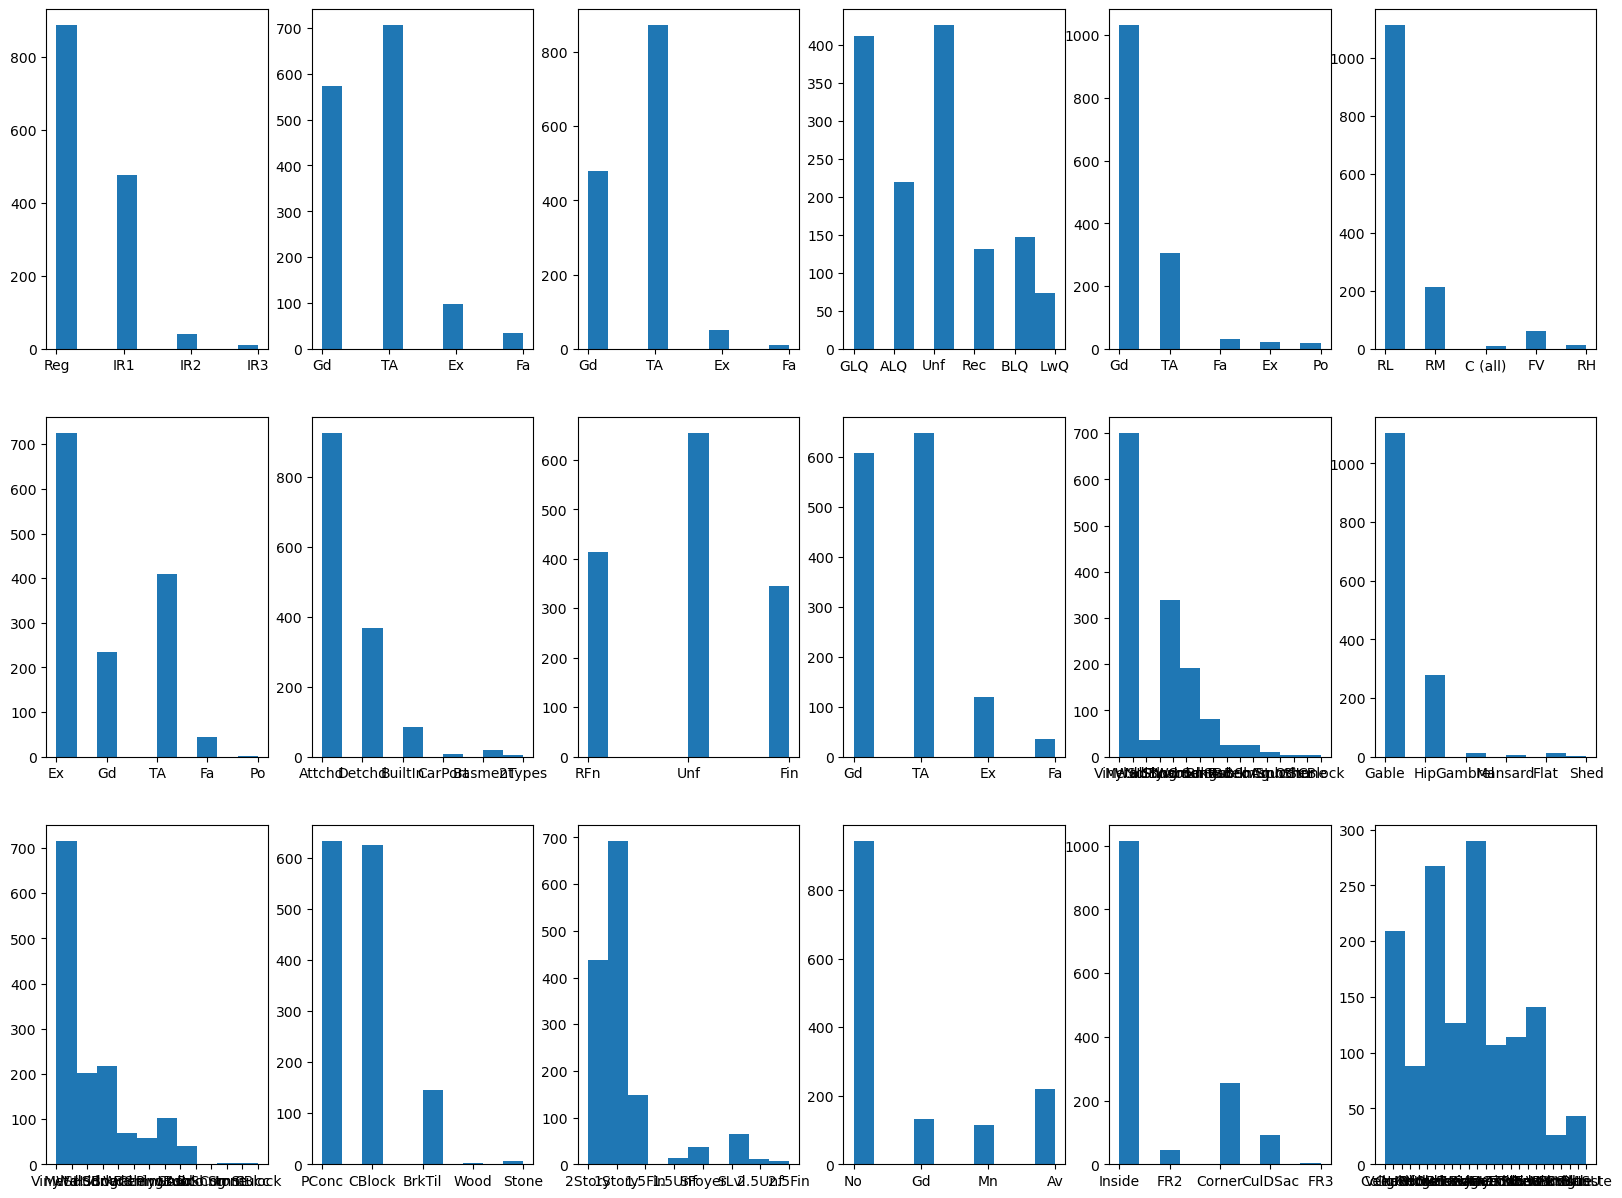

In [30]:
fig , ax = plt.subplots(nrows=3 , ncols=6 ,figsize=(20,15) )
ax = ax.flatten()
j=0
for col in cat_cols:
    ax[j].hist(train_data[col])
    j+=1

In [31]:
print(cat_cols)

['LotShape', 'KitchenQual', 'ExterQual', 'BsmtFinType1', 'FireplaceQu', 'MSZoning', 'HeatingQC', 'GarageType', 'GarageFinish', 'BsmtQual', 'Exterior2nd', 'RoofStyle', 'Exterior1st', 'Foundation', 'HouseStyle', 'BsmtExposure', 'LotConfig', 'Neighborhood']


In [32]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'Neighborhood','FireplaceQu']

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for col in ordinal_cats:
  train_data[col] = LabelEncoder().fit_transform(train_data[col])
   
#-----------------------------------------------------------------------------------------
one_hot_enc_model = OneHotEncoder(sparse_output = False)
one_hot_data = one_hot_enc_model.fit_transform(train_data[nominal_cats])

list_of_arrays = one_hot_enc_model.categories_
col_names= [item for array in list_of_arrays for item in array]


nominal_train_df = pd.DataFrame(data= one_hot_data, columns = col_names)

##### Merging all data

In [34]:
train_data.reset_index(drop=True,inplace=True)
train_data.drop(columns=nominal_cats , inplace=True)

In [35]:
train_data = pd.concat((train_data , nominal_train_df) , axis=1)

In [36]:
train_data.shape

(1412, 127)

#### Spliting Data

In [37]:
data_y = train_data[['SalePrice']]
data_x = train_data[list(set(train_data.columns) - set(['SalePrice']))]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.25, random_state=42)

In [39]:
feats_min_max_scale.remove('SalePrice')
print('feats_std_scale : ',feats_std_scale) 
print('feats_min_max_scale : ',feats_min_max_scale) 

feats_std_scale :  ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'MoSold']
feats_min_max_scale :  ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'YrSold']


#### Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler_x = MinMaxScaler()
x_train[feats_min_max_scale] = min_max_scaler_x.fit_transform(x_train[feats_min_max_scale])
x_val[feats_min_max_scale] = min_max_scaler_x.transform(x_val[feats_min_max_scale])

min_max_scaler_y = MinMaxScaler()
y_train['SalePrice'] = min_max_scaler_y.fit_transform(y_train)
y_val['SalePrice'] =   min_max_scaler_y.transform(y_val)

std_scaler_x = StandardScaler()
x_train[feats_std_scale] = std_scaler_x.fit_transform(x_train[feats_std_scale])
x_val[feats_std_scale] = std_scaler_x.transform(x_val[feats_std_scale])




# Implementing the linear regression model from scratch using the closed form solution
- this method used in sklearn not GD

### Trying a naive approach that implements the closed form solution as it is on non-perfect data
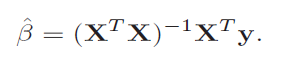

In [36]:
# # should produce an error 
# x_transpose = np.transpose(X_train.values)
# xT_x = np.matmul(x_transpose , X_train.values)
# inverse_xT_x = np.linalg.inv(xT_x)
# optimum_coefficients = np.matmul((np.matmul(inverse_xT_x, x_transpose)), y_train.values)

### Treating the previous error using the Singular Value Decomposition to calculate the pseudo-inverse of the data matrix
optimal coefficients = image.png

In [37]:
# # calculating the economy svd (where the u matrix has the same size as the data matrix X, nad the sigma matrix is square matrix)
# # AKA: no silent vectors in the u Matrix, so it is not square and not orthogonal (uTu = I, but uuT is != I)
# def linear_reg_SVD(X, Y, zero_threshold = 1e-13):
#   u, s, vT = np.linalg.svd(X, full_matrices= False)

#   # Now initialize the "pseudo-"inverse of Sigma, where "pseudo" means "don't divide by zero"
#   sigma_pseudo_inverse = np.zeros((vT.shape[0], vT.shape[0]))

#   ## getting the index of the first approximately zero singular value
#   idx_nearly_zero_sigma= np.where(s <= zero_threshold)[0][0]

#   # 1/non-zero diagonal elements calculation
#   sigma_pseudo_inverse[:idx_nearly_zero_sigma,:idx_nearly_zero_sigma] = np.diag(1/s[ :idx_nearly_zero_sigma])
#   #the above three lines could have been calculated via:
#   # sigma_pseudo_inverse = = np.linalg.pinv(np.diag(s), rcond=1e-13)

#   # calculating the optimal coefficients
#   optimal_coefficients = vT.T.dot(sigma_pseudo_inverse).dot(u.T).dot(Y)
#   return optimal_coefficients

In [38]:
# optimal_coefficients = linear_reg_SVD(X_train, y_train, zero_threshold = 1e-13)
# y_hat_from_scratch = X_train.values.dot(optimal_coefficients)

### Comparing our output to the implemented solution in sklearn (which is calculated using the pseudo inverse of train data as we did above)

In [42]:
## trying the linear regression of sklearn with closed form solution approximated with the SVD as well
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [44]:
regressor.score(x_train , y_train) 

0.9227023569892417

In [45]:
regressor.score(x_val , y_val) 

-3.3453857610162344e+19

In [50]:
y_predicted_train = regressor.predict(x_train)

In [51]:
y_predicted_val = regressor.predict(x_val)

In [49]:
# real_y_hat_val = min_max_scaler_y.inverse_transform(scaled_y_hat_val)
# real_y_val = min_max_scaler_y.inverse_transform(y_val)

In [46]:
# pd.DataFrame(real_y_hat_val).rename(columns={0:'predectid prices'})

In [54]:
from sklearn.metrics import mean_squared_error
train_error = (mean_squared_error(y_train , y_predicted_train))
val_error   = (mean_squared_error(y_val , y_predicted_val))
print('Train_error:',train_error , '   val_error : ',val_error)

Train_error: 0.0036464937950770535    val_error :  1.7059192889531064e+18


## Evaluating matrix of our linear regression model

In [48]:
# def mse(actual, predicted):
#   return np.mean(np.square(actual-predicted))

# def rmse(actual, predicted):
#   return np.sqrt(np.mean(np.square(actual-predicted)))

# def mae(actual, predicted):
#   return np.mean(np.abs(actual-predicted))

# def mape(actual, predicted, epsilon = 0.0001):
#   return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

# def rae(actual, predicted):
#   numerator = np.sum(np.abs(predicted - actual))
#   denominator = np.sum(np.abs(np.mean(actual) - actual))
#   return numerator / denominator

# def r_squared(actual, predicted):
#   sse = np.sum(np.square(actual-predicted))
#   sst = np.sum(np.square(actual-np.mean(actual)))
#   return 1 - (sse/sst)

# def adj_r_squared(X, actual, predicted): 
#   r_squ = r_squared(actual, predicted)
#   first_term = 1 - r_squ
#   sec_term = (len(actual)-1)/(len(actual) - X.shape[1] - 1)
#   return 1 - (first_term * sec_term)

In [49]:
# print('The mean squared error is: ', mse(y_train, y_hat_sklearn))
# print('the root mean squard error is: ', rmse(y_train, y_hat_sklearn))
# print('The mean absolute error is: ', mae(y_train, y_hat_sklearn))
# print('The mean absolute perentage error is: ', mape(y_train, y_hat_sklearn))
# print('The relative absolute error is: ', rae(y_train, y_hat_sklearn))
# print('The coefficient of determination is: ', r_squared(y_train, y_hat_sklearn))
# print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_hat_sklearn))

### when we face Overfitting we have two method to face it :
- first is Subset selection via Hypothesis Testing and to make it work efficint we should remove multicollinearity by using VIF 
- 2nd is regularization using Ridge or Lasso regression 

# Multicollinearity Handling 

In [95]:
print(x_train.shape , x_val.shape)

(1059, 126) (353, 126)


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feats_high_vif_to_be_dropped = []
cleaned_df_from_multi_coll = x_train.copy()
significant_feats_df_val = x_val.copy()

while True:
    vif = [variance_inflation_factor(cleaned_df_from_multi_coll.values, i) for i in range(cleaned_df_from_multi_coll.shape[1])]
    max_vif = max(vif)
    
    if max_vif > 20:
        max_vif_index = vif.index(max_vif)
        feat_to_drop = cleaned_df_from_multi_coll.columns[max_vif_index]
        
        feats_high_vif_to_be_dropped.append(feat_to_drop)
        cleaned_df_from_multi_coll.drop(columns=[feat_to_drop], inplace=True)
        significant_feats_df_val.drop(columns=[feat_to_drop], inplace=True)
    else:
        break


C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781

In [96]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# feats_high_vif_to_be_dropped = []
# cleaned_df_from_multi_coll = x_train.copy()
# significant_feats_df_val = x_val.copy()
# num_cols_removed = 0

# for origin_df_feat_index in range(len(x_train.columns)):
#   num_cols_removed = x_train.shape[1] - cleaned_df_from_multi_coll.shape[1]

#   cleaned_df_feat_index = origin_df_feat_index - num_cols_removed
    
#   VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
#   if VIF_FEAT > 20:
        
#     feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
#     cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns = [cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])
#     significant_feats_df_val.drop(columns = [cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]] , inplace=True)

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarni

In [104]:
print(cleaned_df_from_multi_coll.shape,significant_feats_df_val.shape)

(1059, 103) (353, 103)


In [105]:
len(feats_high_vif_to_be_dropped)

20

#### Having cleaned our training data from multi-collinearity, we can measure the significance level of each feature and perform subset selection using the backward-stepwise method

In [90]:
from statsmodels.api import OLS
LRresult = OLS(y_train.values,cleaned_df_from_multi_coll).fit().summary2().tables[1]
LRresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
MoSold,-0.000063,0.002342,-0.027103,0.978384,-0.004659,0.004532
BsmtFullBath,0.069515,0.015811,4.396701,0.000012,0.038487,0.100542
Veenker,0.103519,0.034343,3.014267,0.002644,0.036123,0.170916
Plywood,-0.021031,0.018612,-1.129978,0.258768,-0.057555,0.015494
Plywood,-0.006718,0.017526,-0.383312,0.701573,-0.041112,0.027676
...,...,...,...,...,...,...
AsbShng,-0.022384,0.043592,-0.513490,0.607727,-0.107930,0.063162
AsbShng,0.015046,0.043829,0.343286,0.731459,-0.070967,0.101059
CarPort,-0.035667,0.037193,-0.958965,0.337818,-0.108656,0.037322
YearRemodAdd,0.016572,0.011088,1.494685,0.135326,-0.005186,0.038331


In [106]:
significant_feats_df = cleaned_df_from_multi_coll
LRresult = (OLS(y_train.values,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})
insignificant_feats_ls = []

while LRresult['P>|t|'].max() > 0.05:
  insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
  insignificant_feats_ls.append(insignificant_feat)
  significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
  significant_feats_df_val.drop(columns = [insignificant_feat] , inplace=True)
  LRresult = (OLS(y_train.values,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

In [107]:
len(insignificant_feats_ls)

41

In [71]:
LRresult

,feature_name,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
0,BsmtFullBath,0.072215,0.014818,4.873501,1.271509e-06,0.043138,0.101292
1,Veenker,0.071447,0.028365,2.518901,1.192492e-02,0.015788,0.127107
2,SawyerW,0.025959,0.012201,2.127564,3.361375e-02,0.002016,0.049902
3,LotArea,0.018677,0.003228,5.786412,9.573545e-09,0.012343,0.025011
4,GarageCars,0.135430,0.016069,8.427925,1.193180e-16,0.103897,0.166963
5,1Story,0.026647,0.011272,2.363961,1.826824e-02,0.004528,0.048767
6,OverallCond,0.129909,0.011908,10.909523,2.795682e-26,0.106543,0.153276
7,NridgHt,0.150185,0.013393,11.213471,1.358251e-27,0.123904,0.176467
8,CemntBd,-0.124531,0.044002,-2.830092,4.745243e-03,-0.210877,-0.038185
9,Somerst,0.105048,0.012046,8.720873,1.111892e-17,0.081411,0.128685


In [108]:
regressor2 = LinearRegression()
regressor2.fit(significant_feats_df , y_train)

LinearRegression()

In [109]:
regressor2.score(significant_feats_df , y_train)

0.8986061349607612

In [110]:
regressor2.score(significant_feats_df_val , y_val)

0.8605854521616614

## Using Shrinkage methods (Ridge, Lasso and Elastic Net) to decrease the variance of the model while sacrificing a little of bias

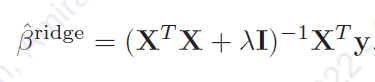
### The above formula can be used for determining the coefficients of ridge regression (but without bias)

In [61]:
# lambda_ = 0.0001
# ridge_coeffs = (np.linalg.inv(X_train.T.dot(X_train) +
#                (lambda_ * np.identity(X_train.shape[1])))).dot((X_train.T).dot(y_train.values))

In [62]:
# y_ridge_from_scratch = X_train.values.dot(ridge_coeffs)

In [111]:
# y_ridge_from_scratch

In [112]:
from sklearn.linear_model import Ridge
regressor3 = Ridge(alpha = 0.0001, fit_intercept=False)
regressor3.fit(x_train, y_train)

Ridge(alpha=0.0001, fit_intercept=False)

In [113]:
regressor3.score(x_train,y_train)

0.9227022219835253

In [114]:
regressor3.score(x_val,y_val)

0.8723881891393637

# Check linear regression Assumptions 
- By scatter to check zero mean and varience and QQ-plot & hist-plot to check normality

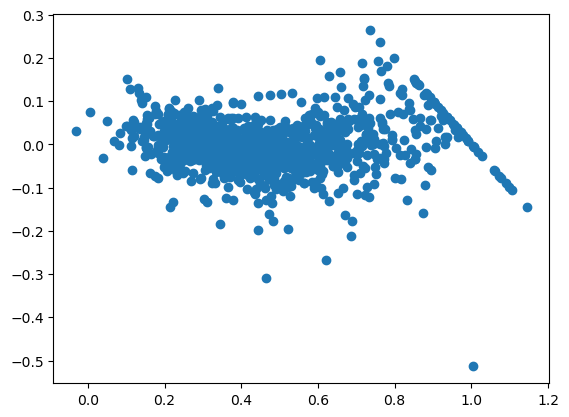

In [119]:
residuals = y_train - y_predicted_train
plt.scatter(y_predicted_train, residuals)
plt.show()

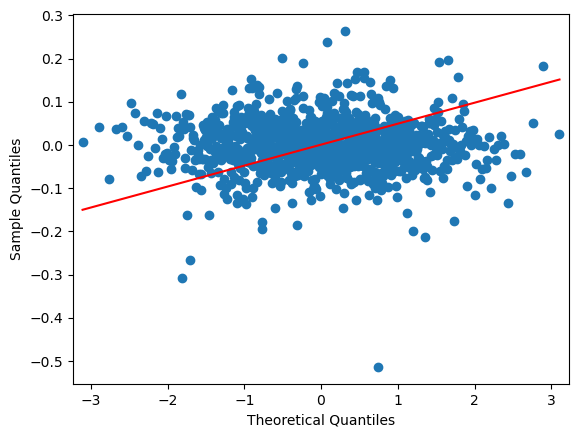

In [120]:
import statsmodels.api as sm
#create Q-Q plot 
fig = sm.qqplot(residuals,line='q', fit = False )
plt.show()

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

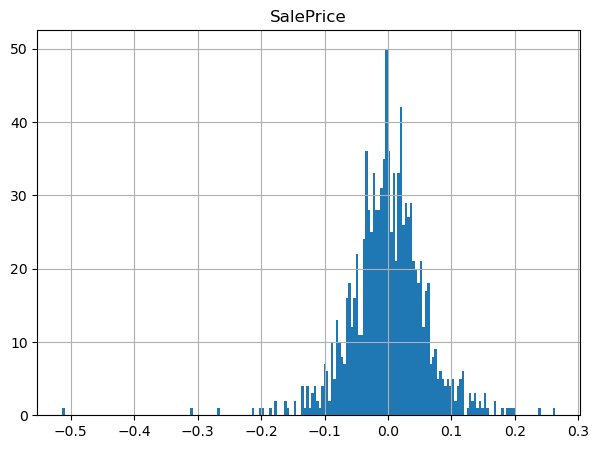

In [123]:
residuals.hist(bins = 200, figsize = (7, 5))

###### Suppose that linear regression not satisfied we will use 
### Basis Expantions

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_train)

regressor4 = LinearRegression()
regressor4.fit(x_poly, y_train)

LinearRegression()

In [125]:
regressor4.score(x_poly, y_train)

1.0

In [127]:
x_val_poly = poly.fit_transform(x_val)

In [128]:
regressor4.score(x_val_poly , y_val)

0.6542854496172439

#### this is overfitting because LR satisfied but I do it Just Try 